### Importing necessary libraries

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns             
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


### Loading the dataset 

In [33]:
#import dataset from data.csv file
dataset = pd.read_csv('/kaggle/input/weather-dataset/weatherHistory.csv')
print(dataset.info())
# print(dataset.dtypes)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB
None


### Exploratory data analysis

Perform exploratory data analysis to get insights about the data and handle any missing values or outliers

1. Remove duplicate rows
2. Check for NULL values in dataset.

**Note** :- Post observation we find null values in precipitation type. A null value in the 'Precip Type' column could mean that the data for that particular time period is missing or was not recorded. It is not safe to assume that a null value means it did not rain or snow.

In [34]:
# print the row count before removing duplicates
print("Row count before removing duplicates:", len(dataset))

# drop duplicates
dataset.drop_duplicates(inplace=True)

# print the row count after removing duplicates
print("Row count after removing duplicates:", len(dataset))

# check for missing values
print(dataset.isnull().sum())


Row count before removing duplicates: 96453
Row count after removing duplicates: 96429
Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64


### Data cleaning 

1. Remove all null values from data set since 517/96429 = 0.0053 << 1

2. Drop Loud Cover as it only contains value 0 (no use in training)

In [35]:
dataset = dataset.dropna()
print(dataset.isnull().sum())


Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64


In [36]:
# Drop the "Loud Cover" column
dataset = dataset.drop('Loud Cover', axis=1)
dataset.info()
dataset.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95912 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            95912 non-null  object 
 1   Summary                   95912 non-null  object 
 2   Precip Type               95912 non-null  object 
 3   Temperature (C)           95912 non-null  float64
 4   Apparent Temperature (C)  95912 non-null  float64
 5   Humidity                  95912 non-null  float64
 6   Wind Speed (km/h)         95912 non-null  float64
 7   Wind Bearing (degrees)    95912 non-null  float64
 8   Visibility (km)           95912 non-null  float64
 9   Pressure (millibars)      95912 non-null  float64
 10  Daily Summary             95912 non-null  object 
dtypes: float64(7), object(4)
memory usage: 8.8+ MB


Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Daily Summary'],
      dtype='object')

### Check for Outliers (Abnormal values) 

an outlier is an observation that lies an abnormal distance from other values in a random sample from a population. Outliers can indicate either measurement or recording errors, or that the data is drawn from a different distribution than the rest of the data. Outliers can skew the results of statistical analyses, affecting the mean, median, and standard deviation of the data. Therefore, it is important to detect and handle outliers appropriately before performing any statistical analysis on the data.

This code loads the weather dataset, checks for outliers using box plots and histograms, and removes outliers by setting threshold values for each variable. Finally, it re-checks for outliers using box plots and histograms to ensure that the outliers have been removed.

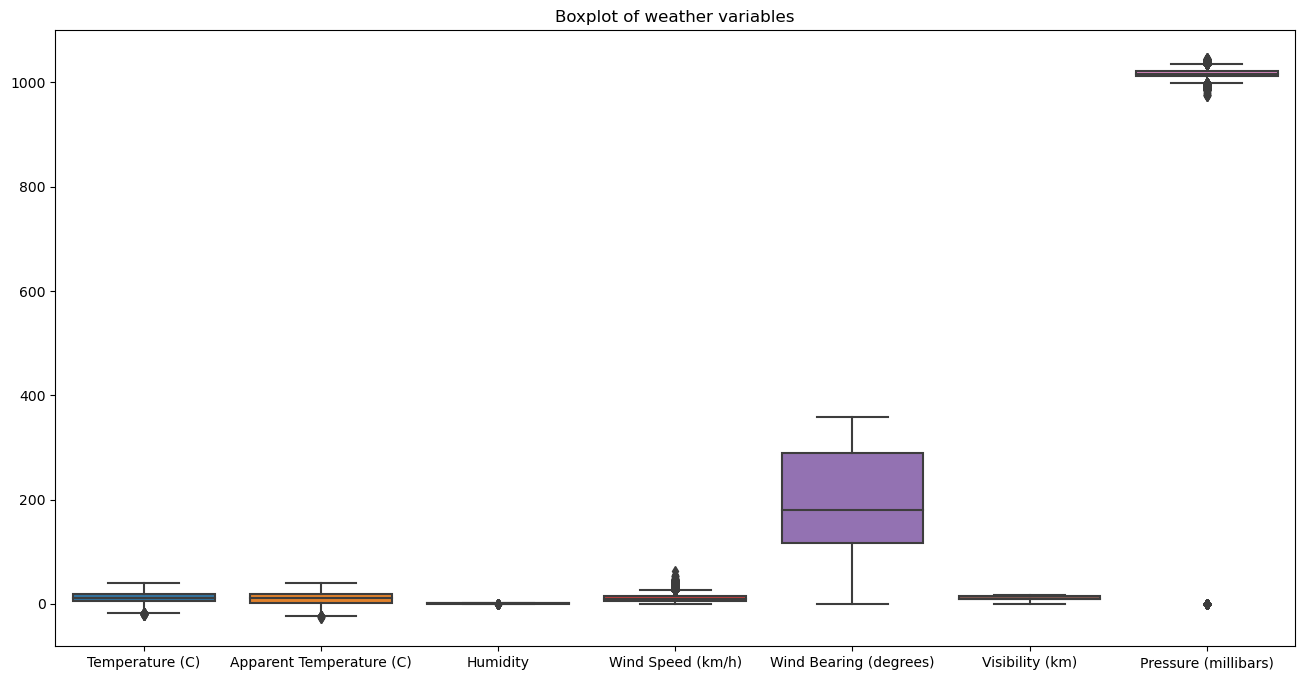

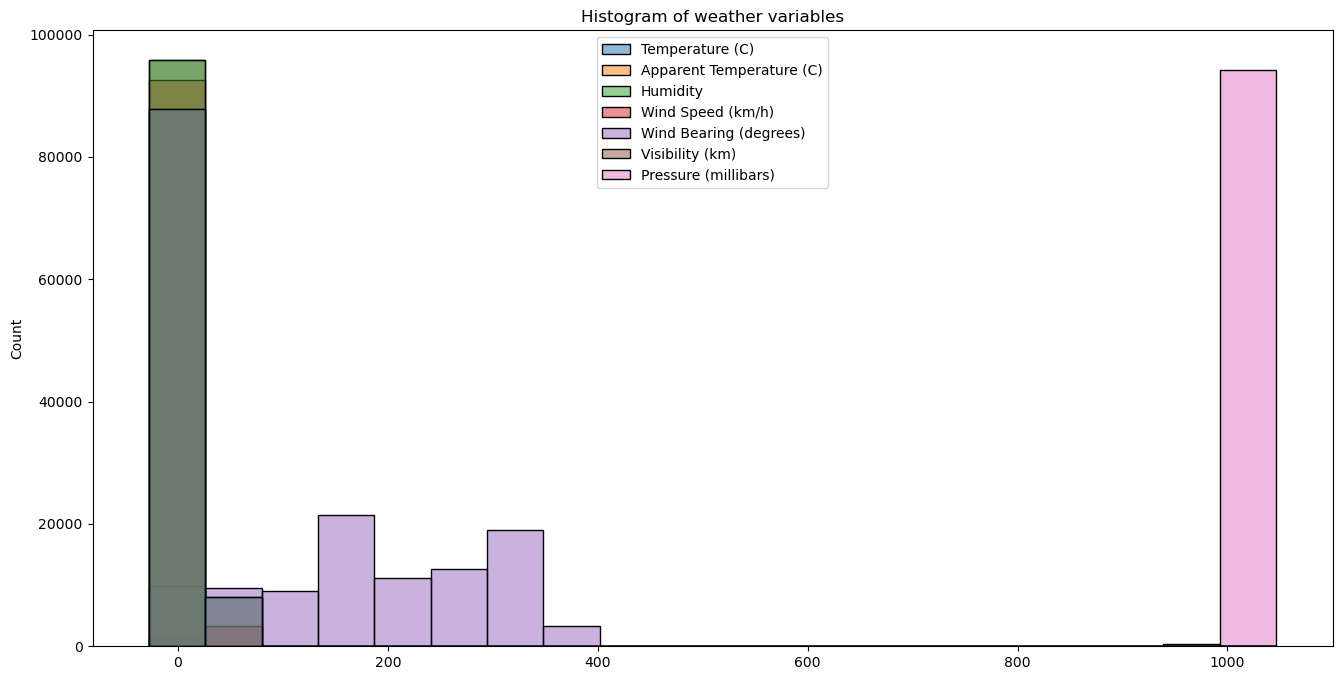

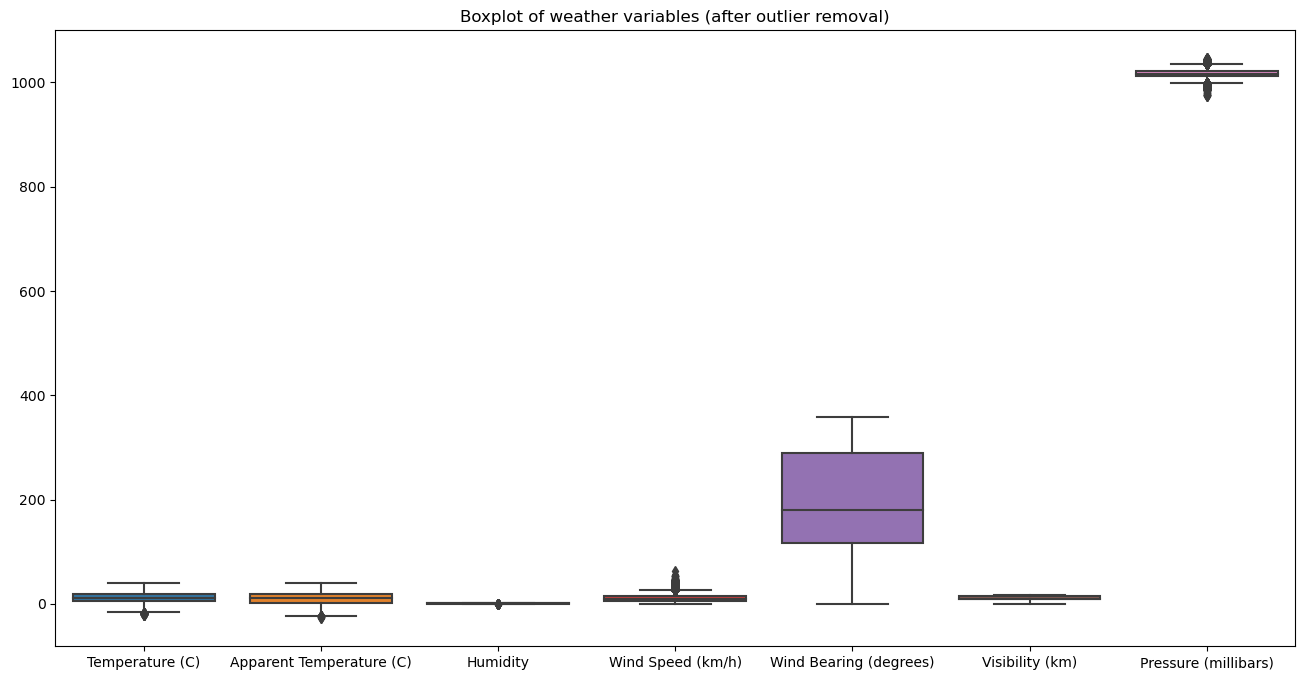

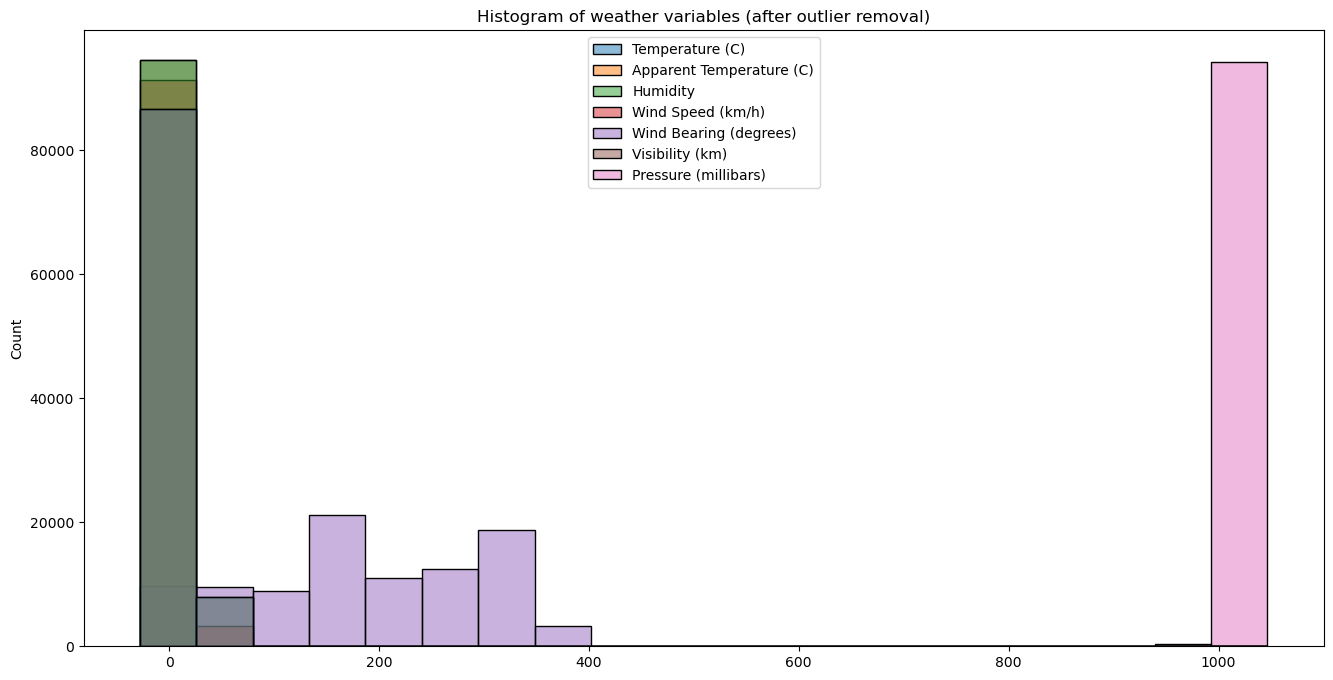

Length of dataset post  outplier removal :  94624


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,94624.000000,94624.000000,94624.000000,94624.000000,94624.000000,94624.000000,94624.000000
mean,11.954747,10.882686,0.734909,10.780227,187.425273,10.397271,1016.801563
std,9.564560,10.706324,0.195838,6.899016,107.400837,4.168015,7.770814
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,973.780000
25%,4.655556,2.300000,0.600000,5.796000,116.000000,8.420300,1012.110000
50%,12.055556,12.055556,0.780000,9.909550,180.000000,10.046400,1016.530000
75%,18.851389,18.851389,0.890000,14.103600,290.000000,14.908600,1021.130000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


In [37]:
# Check for outliers using box plots(only with float type values)
plt.figure(figsize=(16,8))
sns.boxplot(data=dataset[['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']])
plt.title("Boxplot of weather variables")
plt.show()

# Check for outliers using histograms
plt.figure(figsize=(16,8))
sns.histplot(data=dataset[['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']], bins=20)
plt.title("Histogram of weather variables")
plt.show()

# Handle outliers by removing values beyond certain thresholds
dataset = dataset[dataset['Temperature (C)'] < 50]
dataset = dataset[dataset['Humidity'] <= 1]
dataset = dataset[dataset['Wind Speed (km/h)'] < 100]
dataset = dataset[dataset['Wind Bearing (degrees)'] <= 360]
dataset = dataset[dataset['Visibility (km)'] < 50]
dataset = dataset[dataset['Pressure (millibars)'] > 500]
dataset = dataset[dataset['Pressure (millibars)'] < 1100]

# Check for outliers again using box plots
plt.figure(figsize=(16,8))
sns.boxplot(data=dataset[['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']])
plt.title("Boxplot of weather variables (after outlier removal)")
plt.show()

# Check for outliers again using histograms
plt.figure(figsize=(16,8))
sns.histplot(data=dataset[['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']], bins=20)
plt.title("Histogram of weather variables (after outlier removal)")
plt.show()

print("Length of dataset post  outplier removal : ",len(dataset))

dataset.describe()

###  One Hot encode column 'Precip type'   

Label encoding assigns a numerical label to each category in a feature. For example, if there are three categories in a feature, they might be encoded as 0, 1, and 2. One drawback of label encoding is that it may imply an ordinal relationship between the categories when there is none. For example, if we encode "red" as 0, "blue" as 1, and "green" as 2, the model may interpret "green" as being closer to "blue" than to "red," which may not be desirable.

One-hot encoding creates a new binary column for each category in a feature, and assigns a value of 1 for the corresponding category and 0 for all other categories. This avoids the issue of ordinality, but can lead to a large increase in the number of features in the dataset.

**Note the two columns being created at last post one hot encoding of dataset column 'Precip type' in weather_data varible.**

In [38]:
# One-hot encode categorical variables
dataset = pd.get_dummies(dataset, columns=['Precip Type'])

dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94624 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            94624 non-null  object 
 1   Summary                   94624 non-null  object 
 2   Temperature (C)           94624 non-null  float64
 3   Apparent Temperature (C)  94624 non-null  float64
 4   Humidity                  94624 non-null  float64
 5   Wind Speed (km/h)         94624 non-null  float64
 6   Wind Bearing (degrees)    94624 non-null  float64
 7   Visibility (km)           94624 non-null  float64
 8   Pressure (millibars)      94624 non-null  float64
 9   Daily Summary             94624 non-null  object 
 10  Precip Type_rain          94624 non-null  uint8  
 11  Precip Type_snow          94624 non-null  uint8  
dtypes: float64(7), object(3), uint8(2)
memory usage: 8.1+ MB


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Precip Type_rain,Precip Type_snow
count,94624.000000,94624.000000,94624.000000,94624.000000,94624.000000,94624.000000,94624.000000,94624.000000,94624.000000
mean,11.954747,10.882686,0.734909,10.780227,187.425273,10.397271,1016.801563,0.888696,0.111304
std,9.564560,10.706324,0.195838,6.899016,107.400837,4.168015,7.770814,0.314509,0.314509
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,973.780000,0.000000,0.000000
25%,4.655556,2.300000,0.600000,5.796000,116.000000,8.420300,1012.110000,1.000000,0.000000
50%,12.055556,12.055556,0.780000,9.909550,180.000000,10.046400,1016.530000,1.000000,0.000000
75%,18.851389,18.851389,0.890000,14.103600,290.000000,14.908600,1021.130000,1.000000,0.000000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000,1.000000,1.000000


### Convert the 'Formatted Date' column to a datetime format and set it as the index of the dataset

In [39]:
dataset['Formatted Date'] = pd.to_datetime(dataset['Formatted Date'], utc=True)
dataset.set_index('Formatted Date', inplace=True)



### One-hot encode the categorical variables 'Summary' and 'Daily Summary'

total 250 columns generated.

In [40]:
summary_onehot = pd.get_dummies(dataset['Summary'], prefix='Summary')
daily_summary_onehot = pd.get_dummies(dataset['Daily Summary'], prefix='Daily_Summary')

dataset = pd.concat([dataset, summary_onehot, daily_summary_onehot], axis=1)
dataset.drop(['Summary', 'Daily Summary'], axis=1, inplace=True) # remove the columns

dataset.columns

Index(['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)', 'Precip Type_rain', 'Precip Type_snow',
       'Summary_Breezy',
       ...
       'Daily_Summary_Partly cloudy until evening.',
       'Daily_Summary_Partly cloudy until morning.',
       'Daily_Summary_Partly cloudy until night and breezy in the afternoon.',
       'Daily_Summary_Partly cloudy until night and breezy in the morning.',
       'Daily_Summary_Partly cloudy until night and breezy starting in the morning continuing until afternoon.',
       'Daily_Summary_Partly cloudy until night.',
       'Daily_Summary_Rain throughout the day.',
       'Daily_Summary_Rain until afternoon.',
       'Daily_Summary_Rain until morning.',
       'Daily_Summary_Windy in the afternoon.'],
      dtype='object', length=250)

### Normalize the numerical variables

Normalizing the numerical variables means scaling them to have a mean of zero and a standard deviation of one, so that they are on a similar scale and have equal impact on the neural network model. This is important because neural networks often use gradient-based optimization algorithms that can be sensitive to differences in scale between the input variables. Normalization also helps to prevent large inputs from dominating the learning process and improving the convergence of the optimization algorithm.

In [41]:
scaler = MinMaxScaler()
dataset_scaled = pd.DataFrame(scaler.fit_transform(dataset), columns=dataset.columns, index=dataset.index)


### Split the dataset into training and testing sets

80-20 split assumed

It depends on the specific use case and what question or problem we are trying to address with the model. Temperature could be a useful dependent variable if we are interested in predicting temperature itself or its relationship with other variables. However, if we are interested in other weather phenomena, such as precipitation or wind patterns, then other variables may be more appropriate as the dependent variable. It is important to carefully consider the goals of the analysis and select the most appropriate dependent variable based on those goals.

In the case of training a model to predict weather, we can take temperature as our target variable because it is an important and easily measurable factor that people are interested in knowing.

dependent variable -  Temperature

In [42]:
X = dataset_scaled.drop('Temperature (C)', axis=1)
y = dataset_scaled['Temperature (C)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Define and train the neural network

In designing a neural network, all data needs to be in numerical format, so some form of encoding is necessary for categorical variables. One-hot encoding is often preferred over label encoding because it avoids the issue of ordinality, and can help the model better capture non-linear relationships between categorical variables and the target variable.

In [43]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/50
1183/1183 [==============================] - 4s 3ms/step - loss: 0.0030 - val_loss: 1.9383e-04
Epoch 2/50
1183/1183 [==============================] - 3s 2ms/step - loss: 1.6012e-04 - val_loss: 1.2878e-04
Epoch 3/50
1183/1183 [==============================] - 3s 3ms/step - loss: 1.1605e-04 - val_loss: 9.9723e-05
Epoch 4/50
1183/1183 [==============================] - 3s 2ms/step - loss: 9.4698e-05 - val_loss: 7.2263e-05
Epoch 5/50
1183/1183 [==============================] - 3s 3ms/step - loss: 8.0713e-05 - val_loss: 7.7356e-05
Epoch 6/50
1183/1183 [==============================] - 3s 2ms/step - loss: 7.6506e-05 - val_loss: 7.3549e-05
Epoch 7/50
1183/1183 [==============================] - 3s 3ms/step - loss: 6.2409e-05 - val_loss: 7.2147e-05
Epoch 8/50
1183/1183 [==============================] - 3s 2ms/step - loss: 5.6056e-05 - val_loss: 5.5147e-05
Epoch 9/50
1183/1183 [==============================] - 3s 3ms/step - loss: 5.1847e-05 - val_loss: 4.8302e-05
Epoch 10/50
11

### Evaluate the model's performance

In [44]:
loss = model.evaluate(X_test, y_test)
print('Test Loss: {:.2f}'.format(loss))

592/592 [==============================] - 1s 2ms/step - loss: 8.1695e-06
Test Loss: 0.00


592/592 [==============================] - 1s 1ms/step


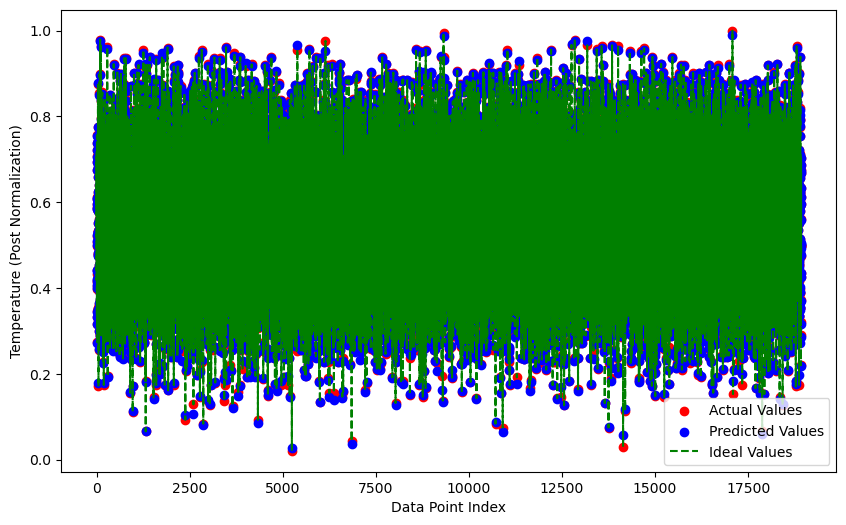



Accuracy: 99.97%


In [45]:
# Get predictions on test data
y_pred = model.predict(X_test)

# Plot the predicted values against actual values
fig = plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='red', label='Actual Values')
plt.scatter(range(len(y_test)), y_pred, color='blue', label='Predicted Values')
plt.plot(range(len(y_test)), y_test, color='green', linestyle='dashed', label='Ideal Values')
plt.xlabel('Data Point Index')
plt.ylabel('Temperature (Post Normalization)')
plt.legend()
plt.show()

# Calculate R-squared value
r_squared = r2_score(y_test, y_pred)

# Print R-squared value as percentage
print('\n\nAccuracy: {:.2f}%'.format(r_squared*100))

### The values of temperature are due to normalization

everthing is less than equal to 1

In [46]:
# Print the minimum and maximum values of the input features after normalization
print('After normalization:')
print(X_train.min())
print(X_train.max())

After normalization:
Apparent Temperature (C)                    0.0
Humidity                                    0.0
Wind Speed (km/h)                           0.0
Wind Bearing (degrees)                      0.0
Visibility (km)                             0.0
                                           ... 
Daily_Summary_Partly cloudy until night.    0.0
Daily_Summary_Rain throughout the day.      0.0
Daily_Summary_Rain until afternoon.         0.0
Daily_Summary_Rain until morning.           0.0
Daily_Summary_Windy in the afternoon.       0.0
Length: 249, dtype: float64
Apparent Temperature (C)                    0.98981
Humidity                                    1.00000
Wind Speed (km/h)                           1.00000
Wind Bearing (degrees)                      1.00000
Visibility (km)                             1.00000
                                             ...   
Daily_Summary_Partly cloudy until night.    1.00000
Daily_Summary_Rain throughout the day.      1.00000
Daily_S